# Image Analysis with the Computer Vision Service

*Computer Vision* is a branch of artificial intelligence (AI) that explores the development of AI systems that can "see" the world, either in real-time through a camera or by analyzing images and video. This is made possible by the fact that digital images are essentially just arrays of numeric pixel values, and we can use those pixel values as *features* to train machine learning models that can classify images, detect discrete objects in an image, and even generate text-based summaries of photographs.

## Use the Computer Vision Cognitive Service

Microsoft Azure includes a number of *cognitive services* that encapsulate common AI functions, including some that can help you build computer vision solutions.

The *Computer Vision* cognitive service provides an obvious starting point for our exploration of computer vision in Azure. It uses pre-trained machine learning models to analyze images and extract information about them.

For example, suppose you wanted to implement a "smart store", in which AI services monitor the store to identify customers requiring assistance, and direct employees to help them. By using the Computer Vision service, images taken by cameras throughout the store can be analyzed to provide meaningful descriptions of what they depict.



### Create a Cognitive Services Resource

Let's start by creating a **Cognitive Services** resource in your Azure subscription:

1. In another browser tab, open the Azure portal at https://portal.azure.com, signing in with your Microsoft account.
2. Click the **&#65291;Create a resource** button, search for *Cognitive Services*, and create a **Cognitive Services** resource with the following settings:
    - **Name**: *Enter a unique name*.
    - **Subscription**: *Your Azure subscription*.
    - **Location**: *Choose any available region*:
    - **Pricing tier**: S0
    - **Resource group**: *Create a resource group with a unique name*.
3. Wait for deployment to complete. Then go to your cognitive services resource, and on the **Overview** page, click the link to manage the keys for the service. You will need the endpoint and keys to connect to your cognitive services resource from client applications.

### Get the Key and Endpoint for your Cognitive Services resource

To use your cognitive services resource, client applications need its endpoint and authentication key:

1. In the Azure portal, on the **Keys and Endpoint** page for your cognitive service resource, copy the **Key1** for your resource and paste it in the code below, replacing **YOUR_COG_KEY**.
2. Copy the **endpoint** for your resource and and paste it in the code below

In [1]:
import sys
import os
from pathlib import Path
sys.version

'3.8.5 (default, Sep  4 2020, 07:30:14) \n[GCC 7.3.0]'

In [2]:
cog_key = 'a74b1832779b4451977bfac06d534db8'
cog_endpoint = 'https://davew-cogsvc.cognitiveservices.azure.com/'

Now that you've set up the key and endpoint, you can use the computer vision service to analyze an image.

To do this from Python, you'll need to run the following cell to install the Azure Cognitive Services Computer Vision package. 

In [ ]:
! pip install azure-cognitiveservices-vision-computervision 

In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

# we are going to load some helper code from the python_code subdir
# linux version
module_path = os.path.abspath(os.path.join('./python_code'))
# windows version
# module_path = os.path.abspath(os.path.join("python_code"))
# print (module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
from python_code import vision

%matplotlib inline

In [13]:
def predict (file):
    # Get a client for the computer vision service
    computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

    # Get a description from the computer vision service
    image_stream = open(file, "rb")
    description = computervision_client.describe_image_in_stream(image_stream)

    # Display image and caption (code in python_code/vision.py)
    vision.show_image_caption(file, description)

Let's evaluate a picture.  You can change this to your picture, just make sure the path is correct.  

![](./images/woman-phone.jpg)

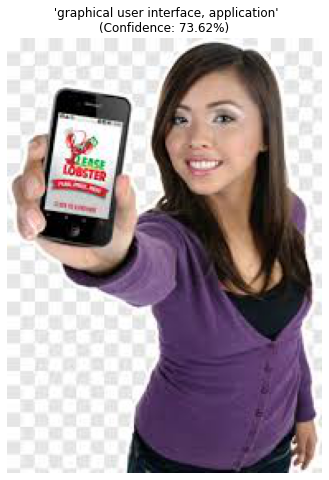

In [14]:
predict('./images/woman-phone.jpg')

Let's look at another one:

![](./images/phone.jpg)

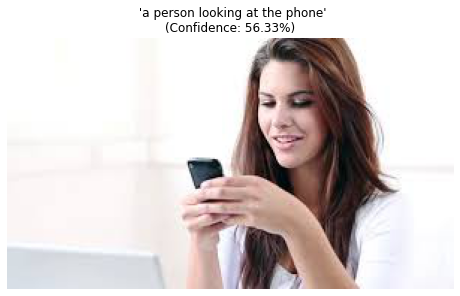

In [7]:
predict('./images/phone.jpg')

One more...

![](./images/woman.jpg)

This _was_ "a woman holding a baby"

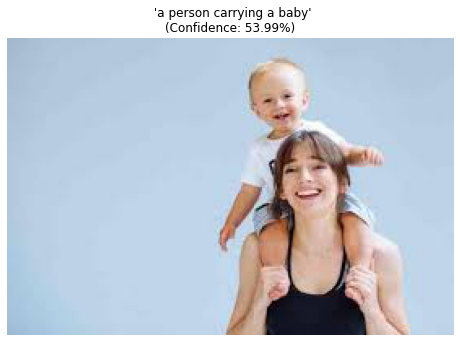

In [8]:
predict('./images/woman.jpg')

## Analyze image features

The Computer Vision service provides analysis capabilities that can extract detailed information like:

- The locations of common types of object detected in the image.
- Location and approximate age of human faces in the image.
- Whether the image contains any 'adult', 'racy', or 'gory' content.
- Relevant tags that could be associated with the image in a database to make it easy to find.

Run the following code to analyze an image of a shopper.

In [15]:
def predict_features(file):
    computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))
    
    # Specify the features we want to analyze
    features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']

    # Get an analysis from the computer vision service
    image_stream = open(file, "rb")
    analysis = computervision_client.analyze_image_in_stream(image_stream, visual_features=features)

    # Show the results of analysis (code in python_code/vision.py)
    vision.show_image_analysis(file, analysis)

Here's our picture:

![](./images/store.jpg)

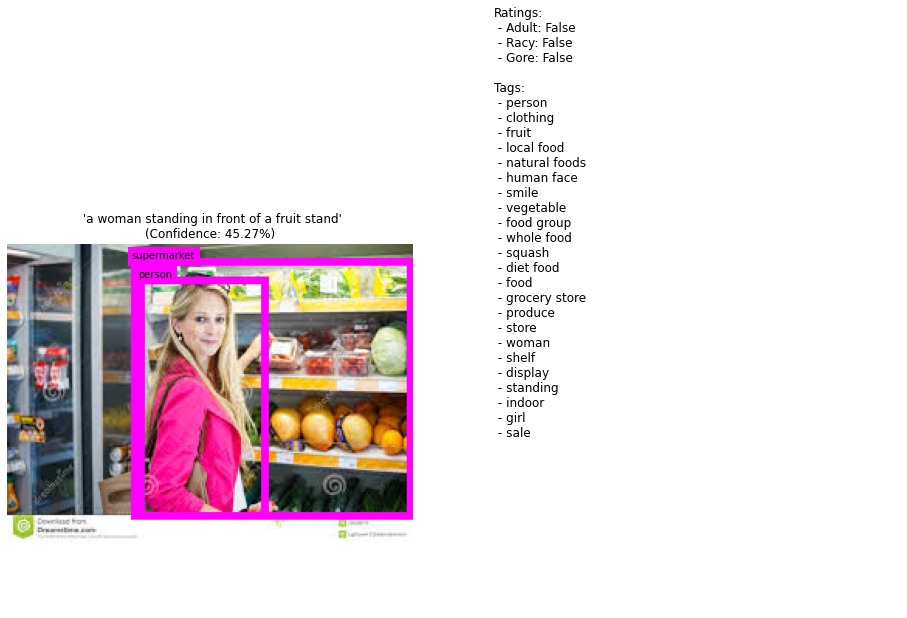

In [16]:
predict_features ("./images/store.jpg")

Men at Work:

![](./images/maw2.jpg)

Formerly, this was described as _men working on the railroad_.  Not anymore...

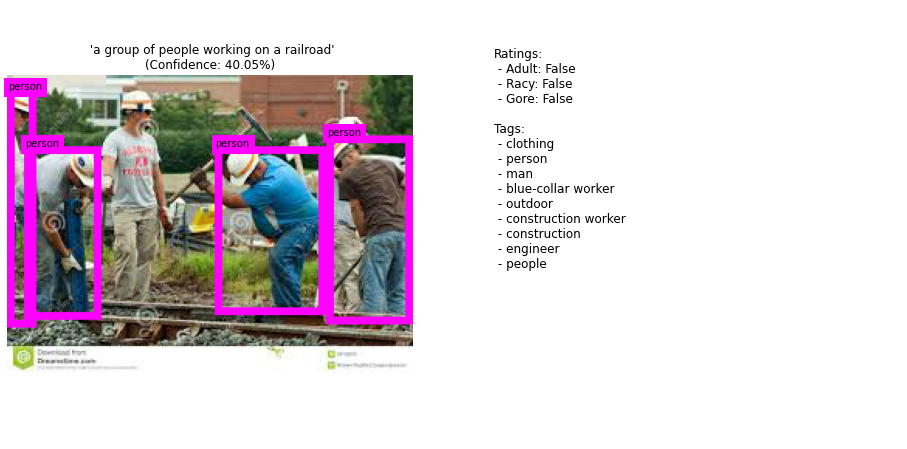

In [17]:
predict_features ("./images/maw2.jpg")

But of course...this is also Men at Work...

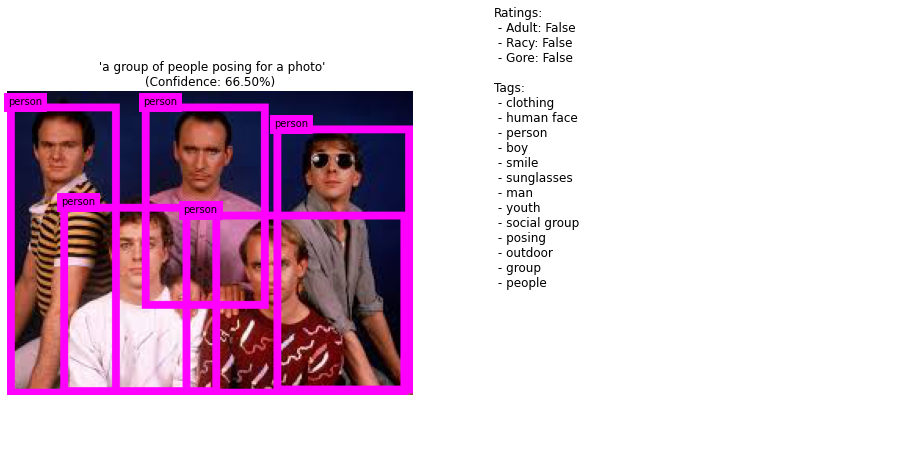

In [18]:
predict_features ("./images/maw1.jpg")


One more...

![](./images/maw3.png)

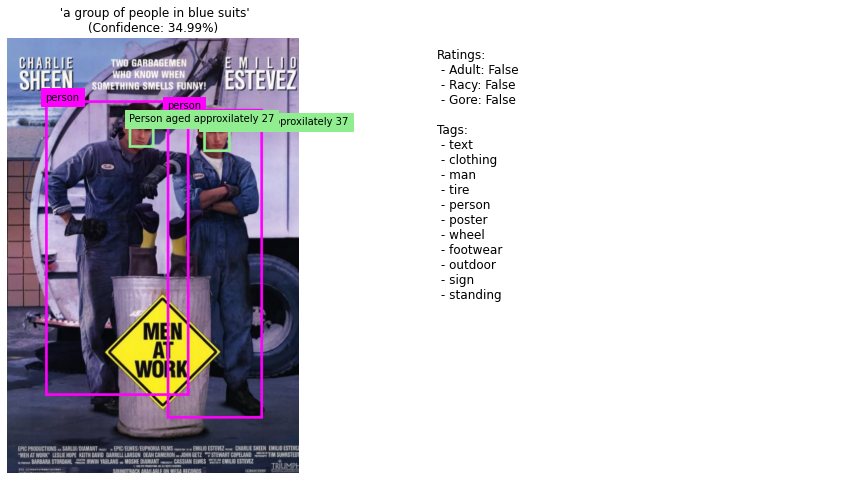

In [19]:
predict_features ("./images/maw3.png")

## Learn More

In addition to the capabilities you've explored in this notebook, the Computer Vision cognitive service includes the ability to:

- Identify celebrities in images.
- Detect brand logos in an image.
- Perform optical character recognition (OCR) to read text in an image.

To learn more about the Computer Vision cognitive service, see the [Computer Vision documentation](https://docs.microsoft.com/azure/cognitive-services/computer-vision/)
